In [ ]:
!pip install matplotlib==3.5.2 rasterio==1.2.10 numpy==1.19.5 Pillow==8.4.0

In [1]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
from PIL import Image
import requests
import rasterio
import tarfile

In [ ]:
#Downloads and unzips glacier data. Size: 69GB Compressed, 160GB Uncompressed.
url = "https://lilablobssc.blob.core.windows.net/icimod-glacier-mapping/hkh_patches.tar.gz"
response = requests.get(url, stream=True)
file = tarfile.open(fileobj=response.raw, mode="r|gz")
file.extractall(path=".")

In [2]:
#Each .tif image has 15 channels: 
#1 LE7 B1 (blue)
#2 LE7 B2 (green)
#3 LE7 B3 (red)
#4 LE7 B4 (near infrared)
#5 LE7 B5 (shortwave infrared 1)
#6 LE7 B6_VCID_1 (low-gain thermal infrared)
#7 LE7 B6_VCID_2 (high-gain thermal infrared)
#8 LE7 B7 (shortwave infrared 2)
#9 LE7 B8 (panchromatic)
#10 LE7 BQA (quality bitmask)
#11 NDVI (vegetation index)
#12 NDSI (snow index)
#13 NDWI (water index)
#14 SRTM 90 elevation
#15 SRTM 90 slope
tifPath = 'glacier_data/raster_data/LE07_134040_20070922.tif'
src = rasterio.open(tifPath)
# Retrieves the image based on it's channel. Channel 1 (LE7 B1 (blue) is used for this example.
image = src.read(1)

In [3]:
# Retrieves the dimensions of the .tif image. Values are in meters.
src.shape

(7176, 7927)

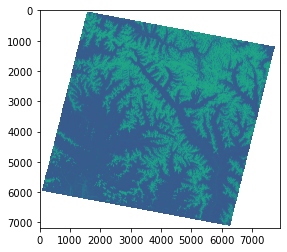

In [4]:
# Display a .tif image cooresponding to the channel selected above.
pyplot.imshow(image)

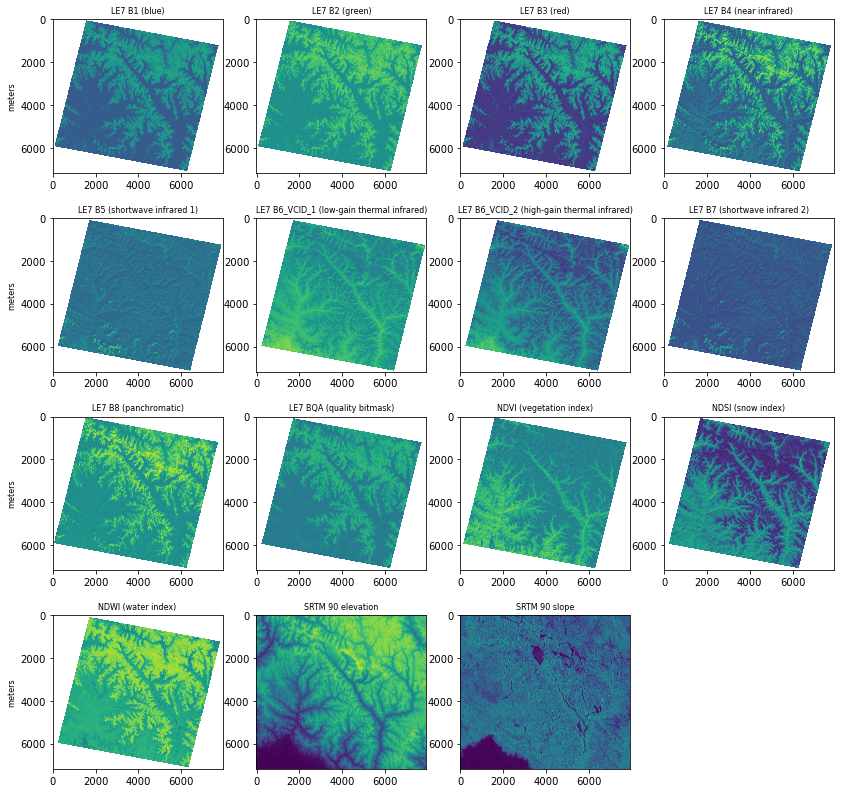

In [5]:
#For a better view of each channel, let's display all the channels at once in a grid for the same .tif image. 
labels = np.array([
          'LE7 B1 (blue)', 
          'LE7 B2 (green)',
          'LE7 B3 (red)',
          'LE7 B4 (near infrared)',
          'LE7 B5 (shortwave infrared 1)',
          'LE7 B6_VCID_1 (low-gain thermal infrared)',
          'LE7 B6_VCID_2 (high-gain thermal infrared)',
          'LE7 B7 (shortwave infrared 2)',
          'LE7 B8 (panchromatic)',
          'LE7 BQA (quality bitmask)',
          'NDVI (vegetation index)',
          'NDSI (snow index)',
          'NDWI (water index)',
          'SRTM 90 elevation',
          'SRTM 90 slope'
         ])
# The image to display each channel for, feel free to change this to any .tif in the raster_data directory.
filepath = 'glacier_data/raster_data/LE07_134040_20070922.tif'
src = rasterio.open(filepath)

fig = plt.figure(figsize=(14, 14))
columns = 4
rows = 4
for i in range(1, 16):
    imageChannel = src.read(i)
    img = imageChannel
    fig.add_subplot(rows, columns, i)
    plt.title(labels[i-1], fontdict={'fontsize': 8})
    if i in (1,5,9,13):
        plt.ylabel('meters', fontdict={'fontsize': 8})
    plt.imshow(img)
plt.show()